In [1]:
import random
import numpy
from scipy.stats import t,norm
import matplotlib.pyplot as plt
import numpy as np

### Q-4: You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim?

<b>Step-1:- Determining the hypothesis</b><br>
Null Hypothesis(H<sub>0</sub>) - Average prediction time is <100ms.<br>
Alternate Hypothesis(H<sub>1</sub>) - Average prediction time is >=100ms.

<b>Step-2:- Sample Collection</b><br>
Collect sample of size n=100 <br>
Calculate mean of the sample:- 97.5

<b>Step-3:-Compute test statistic</b>

$$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$

<b>Step-4:-Decide significance level</b>
<br>

<b>Step-5:-Apply decision rule</b><br>
* If test statistic is t-score
    * Two tailed t-test: $$ |t| > t_{n-1,\frac{\alpha}{2}} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Right tailed t-test: $$ t > t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Left tailed t-test: $$ t < t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

<b>Step-6:- Compute p-value $ P(Test \ Statistics | H_0) $</b><br>
* For two tailed test: $$ p \ value = 2 * (1.0 - cdf(test \ statistic)) $$
* For one tailed test: $$ p \ value = (1.0 - cdf(test \ statistic)) $$
Now, $$ if (p \ value < \alpha) \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

In [2]:
sample = []
n = 100
for i in range(n):
    sample.append(random.randint(90,110))
sample = numpy.array(sample)
print(sample)

[ 90 102  97 102 106 107  99 109  91  94 109 108  91  95  95 102 101  98
  95 110 107 107  90 108 105 106 105 109 108 102  98 106 103 104 105 109
 103 108 106 100  94  95 110  92 109  93 110  90 103  93 100 101 110 100
  96  93 107 105 104 106 108  94  90 104 101 106 103  99 107 106 105  95
  95 104 101 101 108  90  93  92 105 102 110  91 109 100  91 107  92 107
 110 109 100  97 109  98 107  94 100  97]


In [3]:
print(sample.mean())

101.38


In [4]:
confidence = 0.95
alpha = 1-confidence
t_critical = t.ppf(1 - alpha/2,df=19)
print(t_critical)

2.093024054408263


In [5]:
sample_size = 100
sample_mean = sample.mean()
pop_mean = 100
pop_std = sample.std()

In [6]:
def t_score(sample_size, sample_mean, pop_mean, pop_std):
    numerator = sample_mean - pop_mean
    denomenator = pop_std / sample_size**0.5
    return numerator / denomenator

t = t_score(sample_size, sample_mean, pop_mean, pop_std)

print(t)

2.2031239781449834


Text(101.38, 0.0007, 'x_bar')

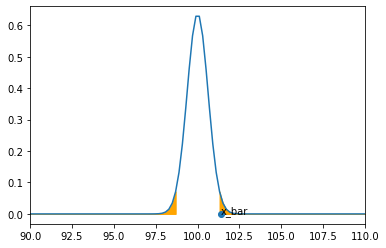

In [7]:
x_min = 90
x_max = 110


mean = pop_mean
std = pop_std / sample_size**0.5


x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)


x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')


plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))

In [8]:
if(np.abs(t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


In [9]:
p_value = 2 * (1.0 - norm.cdf(np.abs(t)))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.02758601158936358
Reject Null Hypothesis


#### Null hypothesis i.e "Average prediction time is <100ms" is rejected. So alternate hypothesis i.e "Average prediction time is >=100" is accepted. So it is concluded that average prediction time is greater than or equal to 100.

<hr style="height:1px">